In [59]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from tkinter import *

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [60]:
#List of the symptoms is listed here in list l1.

l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
'yellow_crust_ooze']

#List of Diseases is listed in list disease.

disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
' Migraine','Cervical spondylosis',
'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
'Impetigo']

l2=[]

for i in range(0,len(l1)):
    l2.append(0)

In [61]:
df=pd.read_csv("Prototype.csv")

#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

#check the df 
#print(df.head())

X= df[l1]

#print(X)

y = df[["prognosis"]]
np.ravel(y)

#print(y)

#Read a csv named Testing.csv

tr=pd.read_csv("Prototype-1.csv")

#Use replace method in pandas.

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

X_test= tr[l1]
y_test = tr[["prognosis"]]

#print(y_test)

np.ravel(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

C:\Users\wmohi\AppData\Local\Temp\ipykernel_1216\2838661857.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)


Accuracy on train data by Random Forest Classifier: 93.65853658536587
Accuracy on test data by Random Forest Classifier: 95.1219512195122


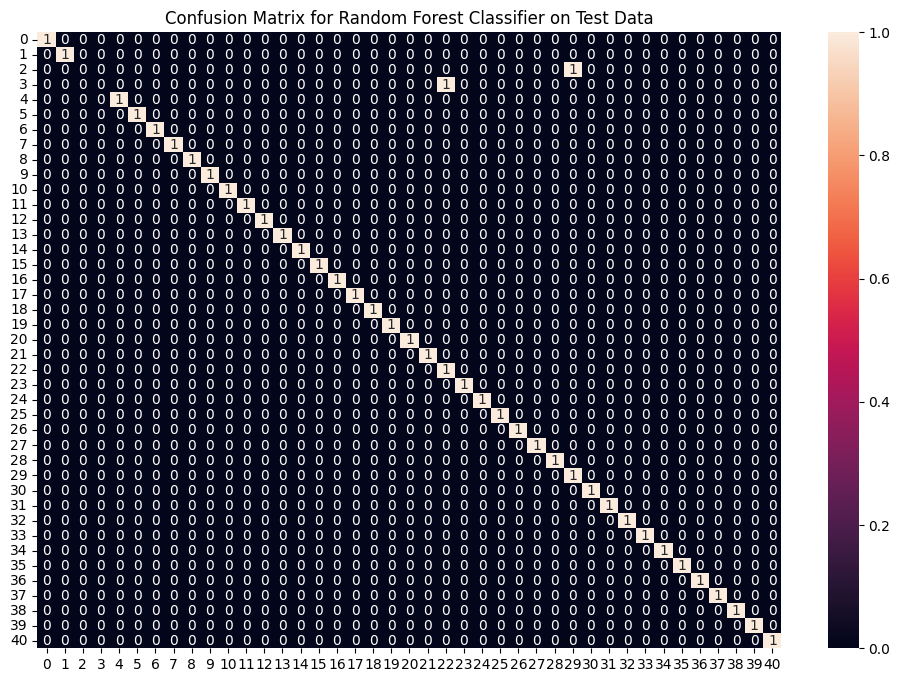

c:\Users\wmohi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train data by Naive Bayes Classifier: 93.65853658536587
Accuracy on test data by Naive Bayes Classifier: 95.1219512195122


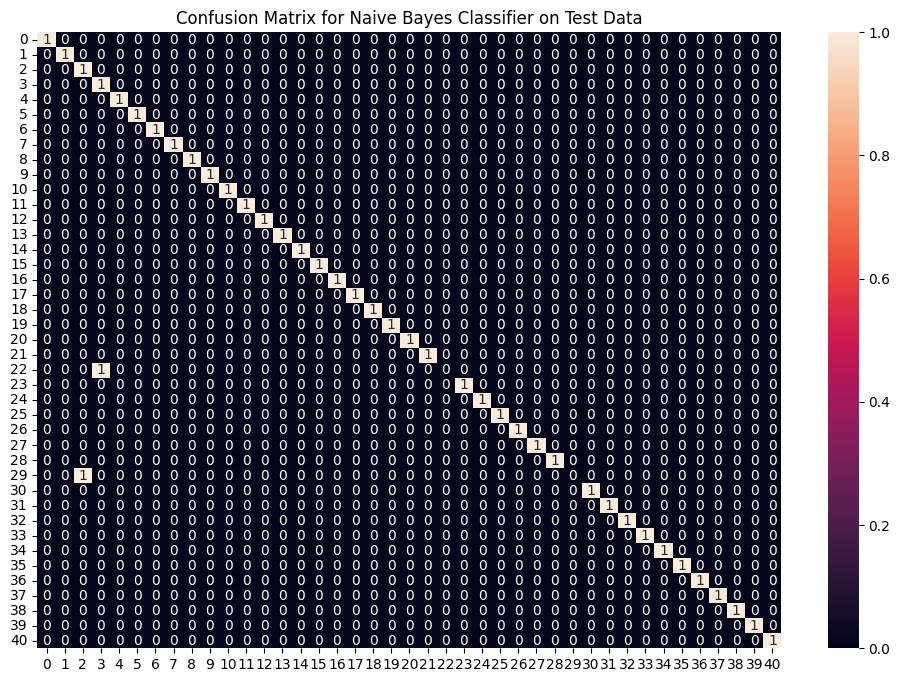

In [62]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, y)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y, rf_model.predict(X))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


# Training and testing Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(X, y)
preds = gnb.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y, gnb.predict(X))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [63]:
def randomforest():
    from sklearn.ensemble import RandomForestClassifier
    clf4 = RandomForestClassifier()
    clf4 = clf4.fit(X,np.ravel(y))

    # calculating accuracy 
    from sklearn.metrics import accuracy_score
    y_pred=clf4.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred,normalize=False))
    
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

    for k in range(0,len(l1)):
        for z in psymptoms:
            if(z==l1[k]):
                l2[k]=1

    inputtest = [l2]
    predict = clf4.predict(inputtest)
    predicted=predict[0]

    h='no'
    for a in range(0,len(disease)):
        if(predicted == a):
            h='yes'
            break

    if (h=='yes'):
        t2.delete("1.0", END)
        t2.insert(END, disease[a])
    else:
        t2.delete("1.0", END)
        t2.insert(END, "Not Found")


def NaiveBayes():
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb=gnb.fit(X,np.ravel(y))

    from sklearn.metrics import accuracy_score
    y_pred=gnb.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred,normalize=False))

    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    for k in range(0,len(l1)):
        for z in psymptoms:
            if(z==l1[k]):
                l2[k]=1

    inputtest = [l2]
    predict = gnb.predict(inputtest)
    predicted=predict[0]

    h='no'
    for a in range(0,len(disease)):
        if(predicted == a):
            h='yes'
            break

    if (h=='yes'):
        t3.delete("1.0", END)
        t3.insert(END, disease[a])
    else:
        t3.delete("1.0", END)
        t3.insert(END, "Not Found")



In [64]:
# GUI stuff..............................................................................
        
root = Tk()
root.configure(background='black')

Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")

Name = StringVar()

w2 = Label(root, justify=LEFT, text="Disease Predictor using Machine Learning", fg="black", bg="White")
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=1, column=0, columnspan=2, padx=100)


NameLb = Label(root, text="Name of the Patient", fg="violet", bg="white")
NameLb.config(font=("Times",15,"bold italic"))
NameLb.grid(row=6, column=0, pady=15, sticky=W)

S1Lb = Label(root, text="Symptom 1", fg="Green", bg="white")
S1Lb.config(font=("Times",15,"bold italic"))
S1Lb.grid(row=7, column=0, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2", fg="Green", bg="white")
S2Lb.config(font=("Times",15,"bold italic"))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Green",bg="white")
S3Lb.config(font=("Times",15,"bold italic"))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Green", bg="white")
S4Lb.config(font=("Times",15,"bold italic"))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Green", bg="white")
S5Lb.config(font=("Times",15,"bold italic"))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)


destreeLb = Label(root, text="RandomForest", fg="white", bg="Orange")
destreeLb.config(font=("Times",15,"bold italic"))
destreeLb.grid(row=17, column=0, pady=10, sticky=W)

ranfLb = Label(root, text="NaiveBayes", fg="White", bg="green")
ranfLb.config(font=("Times",15,"bold italic"))
ranfLb.grid(row=19, column=0, pady=10, sticky=W)

OPTIONS = sorted(l1)

NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)



rnf = Button(root, text="Prediction 1", command=randomforest,bg="white",fg="green")
rnf.config(font=("Times",15,"bold italic"))
rnf.grid(row=9, column=3,padx=10)

lr = Button(root, text="Prediction 2", command=NaiveBayes,bg="white",fg="red")
lr.config(font=("Times",15,"bold italic"))
lr.grid(row=10, column=3,padx=10)


t2 = Text(root, height=1, width=40,bg="yellow",fg="Blue")
t2.config(font=("Times",15,"bold italic"))
t2.grid(row=17, column=1 , padx=10)

t3 = Text(root, height=1, width=40,bg="green",fg="white")
t3.config(font=("Times",15,"bold italic"))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()